In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('winequality-red.csv')

# Exploring the data

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

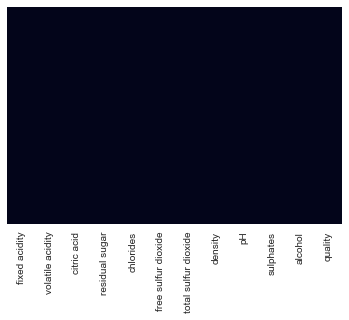

In [8]:
## We can see there is not NaN values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

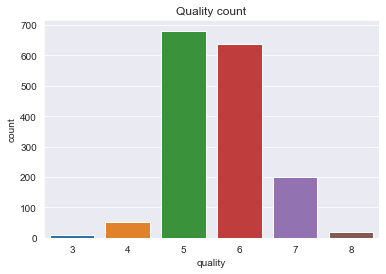

In [68]:
sns.countplot(x='quality',data = df)
plt.title('Quality count')
plt.show()

In [55]:
df.corr()['quality'].sort_values(ascending=False)[1:]

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

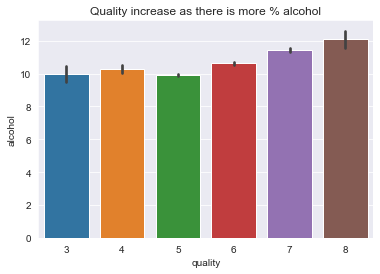

In [89]:
sns.barplot(x = 'quality' ,y = 'alcohol', data = df)
plt.title('Quality increase as there is more % alcohol')
plt.show()

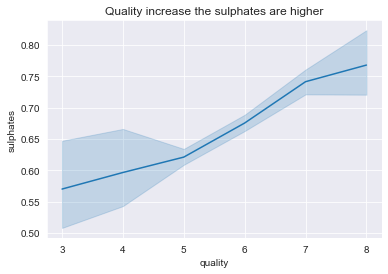

In [88]:
sns.lineplot(x = 'quality' ,y = 'sulphates', data = df)
plt.title('Quality increase the sulphates are higher')
plt.show()

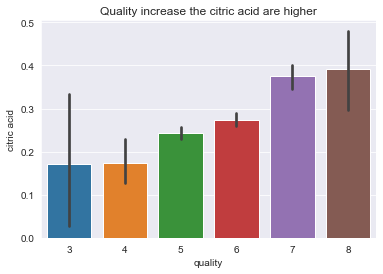

In [87]:
sns.barplot(x = 'quality' ,y = 'citric acid', data = df)
plt.title('Quality increase the citric acid are higher')
plt.show()

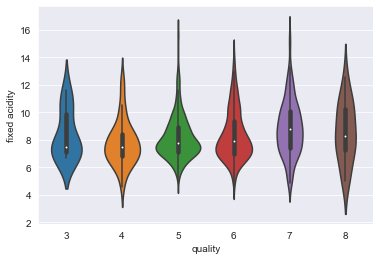

In [83]:
## Fixed acidity not giving much information about the wine quality
sns.violinplot(x = 'quality' , y = 'fixed acidity' , data = df)
plt.show()

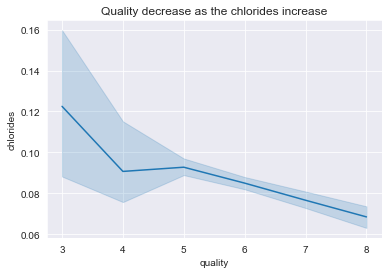

In [86]:
sns.lineplot(x = 'quality' ,y = 'chlorides', data = df)
plt.title('Quality decrease as the chlorides increase')
plt.show()

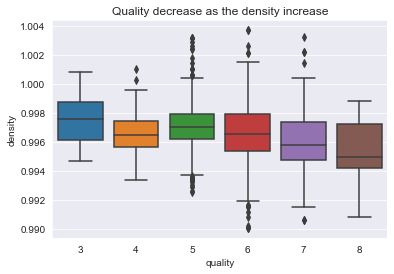

In [85]:
sns.boxplot(x = 'quality' , y = 'density' , data = df)
plt.title('Quality decrease as the density increase')
plt.show()

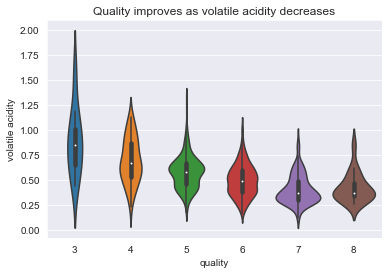

In [90]:
sns.violinplot(x = 'quality' , y = 'volatile acidity' , data = df)
plt.title('Quality improves as volatile acidity decreases')
plt.show()

### Conclusion from analysis

#### 1.With the increase of quality score , the composition of chlorides and volatile acidity decreases.

#### 2.With the increase of quality score , the compostion of alcohol, sulphates , density and citric acid increases

<AxesSubplot:>

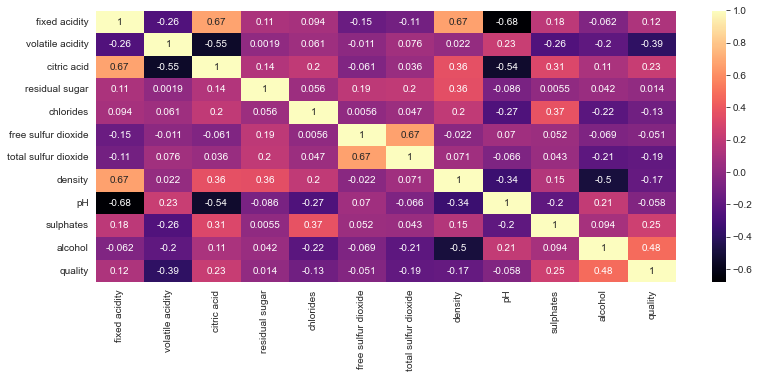

In [100]:
plt.figure(figsize = (13,5))
sns.heatmap(df.corr(),cmap='magma',annot = True)

# Splitting the data

In [120]:
X = df.drop(['quality'],axis =1 )
y = df['quality']

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3 , random_state=0)

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic regression

In [158]:
from sklearn.linear_model import LogisticRegression
lrmo = LogisticRegression()
lrmo.fit(X_train , y_train)

LogisticRegression()

In [159]:
lrmopred = lrmo.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test,lrmopred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.06      0.11        17
           5       0.67      0.75      0.71       231
           6       0.59      0.60      0.60       226
           7       0.36      0.34      0.35        50
           8       0.00      0.00      0.00         5

    accuracy                           0.61       533
   macro avg       0.44      0.29      0.29       533
weighted avg       0.61      0.61      0.60       533



In [161]:
lrmo_acc = accuracy_score(y_test, lrmo.predict(X_test))
print(f"Accuracy Score is {lrmo_acc}")

Accuracy Score is 0.6135084427767354


## K-Nearst Neighbour

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [132]:
knnpred = knn.predict(X_test)

In [135]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.25      0.12      0.16        17
           5       0.62      0.68      0.65       231
           6       0.56      0.54      0.55       226
           7       0.41      0.38      0.40        50
           8       0.00      0.00      0.00         5

    accuracy                           0.56       533
   macro avg       0.31      0.29      0.29       533
weighted avg       0.55      0.56      0.56       533



In [136]:
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy Score is {knn_acc}")

Accuracy Score is 0.5647279549718575


## Decision tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
dtpred = dt.predict(X_test)
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.05      0.06      0.05        17
           5       0.71      0.64      0.67       231
           6       0.59      0.59      0.59       226
           7       0.38      0.56      0.45        50
           8       0.00      0.00      0.00         5

    accuracy                           0.58       533
   macro avg       0.29      0.31      0.29       533
weighted avg       0.59      0.58      0.58       533



In [143]:
dt_acc = accuracy_score(y_test, dt.predict(X_test))
print(f"Accuracy Score is {dt_acc}")

Accuracy Score is 0.5797373358348968


## Random forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [144]:
rfpred = rf.predict(X_test)
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        17
           5       0.72      0.81      0.76       231
           6       0.69      0.65      0.67       226
           7       0.51      0.56      0.53        50
           8       0.00      0.00      0.00         5

    accuracy                           0.68       533
   macro avg       0.32      0.34      0.33       533
weighted avg       0.65      0.68      0.66       533



In [145]:
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Accuracy Score is {rf_acc}")

Accuracy Score is 0.6791744840525328


## SVM

In [147]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [148]:
svcpred = svc.predict(X_test)
print(classification_report(y_test,svcpred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        17
           5       0.68      0.74      0.71       231
           6       0.61      0.67      0.64       226
           7       0.53      0.36      0.43        50
           8       0.00      0.00      0.00         5

    accuracy                           0.64       533
   macro avg       0.30      0.29      0.30       533
weighted avg       0.60      0.64      0.62       533



In [149]:
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(f"Accuracy Score is {svc_acc}")

Accuracy Score is 0.6378986866791745


## Gradient Boosting

In [151]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [152]:
gbpred = gb.predict(X_test)
print(classification_report(y_test,gbpred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.06      0.08        17
           5       0.72      0.75      0.74       231
           6       0.67      0.63      0.65       226
           7       0.44      0.56      0.49        50
           8       0.00      0.00      0.00         5

    accuracy                           0.65       533
   macro avg       0.33      0.33      0.33       533
weighted avg       0.64      0.65      0.64       533



In [153]:
gb_acc = accuracy_score(y_test, gb.predict(X_test))
print(f"Accuracy Score is {gb_acc}")

Accuracy Score is 0.6472795497185742


# Final comparsion between the models

In [154]:
models = pd.DataFrame({'Model' : ['Logistic Regression' , 'KNN' , 'Decision Tree' ,
                                  'Random Forest' , 'SVC' , 'Gradient Boosting'],
                      'Score' : [lrmo_acc , knn_acc , dt_acc , rf_acc , svc_acc , gb_acc]})

In [157]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.679174
5,Gradient Boosting,0.647280
4,SVC,0.637899
0,Logistic Regression,0.613508
2,Decision Tree,0.579737
1,KNN,0.564728
